In [1]:
from ldpc_bpsk_gaussian_system import LdpcBpskGaussianSystem
from utils import *
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)

In [3]:
N = 1001
n_groups = 10
N_bits = N * n_groups
dv = 3
dc = 7
max_iter = 10
Eb = 1
snr_db_values = np.arange(0, 5.5, 0.5)
N0_values = [N0_from_db_value(i, Eb) for i in snr_db_values]
original = np.zeros(N_bits)
info_bit_error_probas = []
uncoded_info_bit_error_probas = []

for N0 in N0_values:
    system = LdpcBpskGaussianSystem(N0, Eb, dv, dc, N, max_iter)
    decoded_bits_groups = []
    uncoded_bits_groups = []
    for i in tqdm(range(n_groups)):
        decoded_bits_groups.append(system.apply_noise_and_decode()) 
        uncoded_bits_groups.append(system.get_uncoded_bits())
    decoded_bits_groups = np.array(decoded_bits_groups)
    uncoded_bits_groups = np.array(uncoded_bits_groups)
    decoded = decoded_bits_groups.reshape(-1)
    uncoded = uncoded_bits_groups.reshape(-1)
    info_bit_error_proba = np.not_equal(original, decoded).sum()/len(original)
    info_bit_error_probas.append(info_bit_error_proba)
    uncoded_info_bit_error_proba = np.not_equal(original, uncoded).sum()/len(original)
    uncoded_info_bit_error_probas.append(uncoded_info_bit_error_proba)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:16<00:00,  1.64s/it]


In [4]:
info_bit_error_probas

[0.12057942057942057,
 0.11728271728271729,
 0.11158841158841158,
 0.12287712287712288,
 0.13186813186813187,
 0.14735264735264736,
 0.15454545454545454,
 0.16993006993006993,
 0.1907092907092907,
 0.21858141858141858,
 0.23436563436563437]

In [7]:
decoded_bits_groups

array([[1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
        1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1.,
        1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1.,
        0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
        1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 

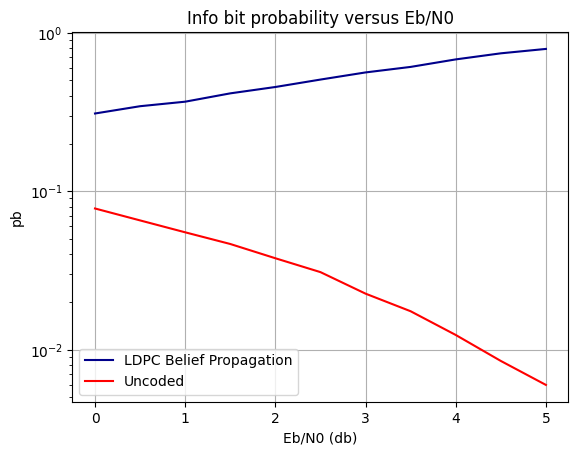

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(snr_db_values, info_bit_error_probas, color="darkblue")
ax.plot(snr_db_values, uncoded_info_bit_error_probas, color="red")
ax.grid()
ax.set_yscale('log')
ax.set_title("Info bit probability versus Eb/N0")
ax.set_xlabel("Eb/N0 (db)")
ax.set_ylabel("pb")
ax.legend(["LDPC Belief Propagation", "Uncoded"])

In [36]:
fig.savefig('pb_snr.png')